In [61]:
from pyDeepInsight import ImageTransformer, LogScaler, CAMFeatureSelector

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
import torch
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score

In [62]:
expr = pd.read_csv('../data/tables/X_trainGBM.csv')
last_row_e = expr.index[-1]
expr = expr.drop(last_row_e)
print(expr.head())

  TargetName  TMA 27 R1 | 001 | Geometric Segment  \
0      ATP7B                            49.983944   
1       ERN1                            60.775932   
2      KRT74                            31.239965   
3    SPECC1L                            46.007948   
4      FOXJ1                            45.439949   

   TMA 27 R1 | 002 | Geometric Segment  TMA 27 R1 | 003 | Geometric Segment  \
0                            46.519148                            51.213741   
1                            49.501144                            42.021531   
2                            34.591161                            26.920043   
3                            47.115547                            43.991290   
4                            54.272339                            55.153259   

   TMA 27 R1 | 004 | Geometric Segment  TMA 27 R1 | 005 | Geometric Segment  \
0                            45.655397                            60.557470   
1                            50.591115          

In [63]:
expr.set_index('TargetName',inplace=True)
expr_transposed = expr.transpose()
expr_transposed.to_csv('../data/tables/X_trainGBM_transposed.csv')
print(expr_transposed.head())
print(expr_transposed.shape)

TargetName                               ATP7B       ERN1      KRT74  \
TMA 27 R1 | 001 | Geometric Segment  49.983944  60.775932  31.239965   
TMA 27 R1 | 002 | Geometric Segment  46.519148  49.501144  34.591161   
TMA 27 R1 | 003 | Geometric Segment  51.213741  42.021531  26.920043   
TMA 27 R1 | 004 | Geometric Segment  45.655397  50.591115  44.421467   
TMA 27 R1 | 005 | Geometric Segment  60.557470  49.547021  39.637617   

TargetName                             SPECC1L      FOXJ1     OR4K15  \
TMA 27 R1 | 001 | Geometric Segment  46.007948  45.439949  58.503934   
TMA 27 R1 | 002 | Geometric Segment  47.115547  54.272339  58.447134   
TMA 27 R1 | 003 | Geometric Segment  43.991290  55.153259  51.870327   
TMA 27 R1 | 004 | Geometric Segment  33.316100  59.228623  53.058975   
TMA 27 R1 | 005 | Geometric Segment  45.142842  67.163740  56.153291   

TargetName                                 PDC      MUC15   C1orf189  \
TMA 27 R1 | 001 | Geometric Segment  40.327955  24.991972  58.

In [64]:
label = pd.read_csv('../data/tables/y_trainGBM.csv')
print(label.shape)
print(label.head())


(272, 2)
                                Sample  ID
0  TMA 27 R1 | 001 | Geometric Segment   0
1  TMA 27 R1 | 002 | Geometric Segment   0
2  TMA 27 R1 | 003 | Geometric Segment   0
3  TMA 27 R1 | 004 | Geometric Segment   0
4  TMA 27 R1 | 005 | Geometric Segment   0


In [65]:
ID_list = label['ID'].tolist()
print(ID_list)
print("length of ID list is: {}".format(len(ID_list)))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
length of ID list is: 272


In [66]:
expr_transposed["ID"] = ID_list
print(expr_transposed.head())

TargetName                               ATP7B       ERN1      KRT74  \
TMA 27 R1 | 001 | Geometric Segment  49.983944  60.775932  31.239965   
TMA 27 R1 | 002 | Geometric Segment  46.519148  49.501144  34.591161   
TMA 27 R1 | 003 | Geometric Segment  51.213741  42.021531  26.920043   
TMA 27 R1 | 004 | Geometric Segment  45.655397  50.591115  44.421467   
TMA 27 R1 | 005 | Geometric Segment  60.557470  49.547021  39.637617   

TargetName                             SPECC1L      FOXJ1     OR4K15  \
TMA 27 R1 | 001 | Geometric Segment  46.007948  45.439949  58.503934   
TMA 27 R1 | 002 | Geometric Segment  47.115547  54.272339  58.447134   
TMA 27 R1 | 003 | Geometric Segment  43.991290  55.153259  51.870327   
TMA 27 R1 | 004 | Geometric Segment  33.316100  59.228623  53.058975   
TMA 27 R1 | 005 | Geometric Segment  45.142842  67.163740  56.153291   

TargetName                                 PDC      MUC15   C1orf189  \
TMA 27 R1 | 001 | Geometric Segment  40.327955  24.991972  58.

In [67]:
ID_col = expr_transposed.pop('ID')
expr_transposed.insert(1, 'ID', ID_col)
expr_transposed.to_csv('../data/tables/X_trainGBM_transposed_with_ID.csv', index=True)
print(expr_transposed.head())

TargetName                               ATP7B  ID       ERN1      KRT74  \
TMA 27 R1 | 001 | Geometric Segment  49.983944   0  60.775932  31.239965   
TMA 27 R1 | 002 | Geometric Segment  46.519148   0  49.501144  34.591161   
TMA 27 R1 | 003 | Geometric Segment  51.213741   0  42.021531  26.920043   
TMA 27 R1 | 004 | Geometric Segment  45.655397   0  50.591115  44.421467   
TMA 27 R1 | 005 | Geometric Segment  60.557470   0  49.547021  39.637617   

TargetName                             SPECC1L      FOXJ1     OR4K15  \
TMA 27 R1 | 001 | Geometric Segment  46.007948  45.439949  58.503934   
TMA 27 R1 | 002 | Geometric Segment  47.115547  54.272339  58.447134   
TMA 27 R1 | 003 | Geometric Segment  43.991290  55.153259  51.870327   
TMA 27 R1 | 004 | Geometric Segment  33.316100  59.228623  53.058975   
TMA 27 R1 | 005 | Geometric Segment  45.142842  67.163740  56.153291   

TargetName                                 PDC      MUC15   C1orf189  ...  \
TMA 27 R1 | 001 | Geometric Segme

In [68]:
y = expr_transposed['ID'].values
X = expr_transposed.iloc[:, 2:].values
genes = expr_transposed.iloc[:, 2:].columns.to_numpy()
random_state=1515
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=23, stratify=y)


In [69]:

ln = LogScaler()
X_train_norm = ln.fit_transform(X_train)
X_test_norm = ln.transform(X_test)

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

le_mapping = dict(zip(le.transform(le.classes_), le.classes_))
num_classes = np.unique(y_train_enc).size

In [70]:
distance_metric = 'cosine'
reducer = TSNE(
    n_components=2,
    metric=distance_metric,
    square_distances=True,
    n_jobs=-1
)
pixel_size = (227,227)
it = ImageTransformer(
    feature_extractor=reducer,
    pixels=pixel_size)

In [74]:
X_train_img = it.fit_transform(X_train_norm)
X_test_img = it.transform(X_test_norm)

C:\Users\sathy\OneDrive\Documents\GitHub\Glioblastoma_analysis\venv\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\sathy\OneDrive\Documents\GitHub\Glioblastoma_analysis\venv\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\sathy\OneDrive\Documents\GitHub\Glioblastoma_analysis\venv\lib\site-packages\sklearn\manifold\_t_sne.py:825: FutureWarning: The parameter `square_distances` has not effect and will be removed in version 1.3.
  warnings.warn(


In [71]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [72]:
net = torch.hub.load(
    'pytorch/vision:v0.10.0', 'squeezenet1_1',
    pretrained=True, verbose=False)
net.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1,1),
                              stride=(1,1))
net = net.to(device)

Downloading: "https://github.com/pytorch/vision/archive/v0.10.0.zip" to C:\Users\sathy/.cache\torch\hub\v0.10.0.zip
Downloading: "https://download.pytorch.org/models/squeezenet1_1-b8a52dc0.pth" to C:\Users\sathy/.cache\torch\hub\checkpoints\squeezenet1_1-b8a52dc0.pth


  0%|          | 0.00/4.73M [00:00<?, ?B/s]

In [75]:
batch_size=200
preprocess = transforms.Compose([transforms.ToTensor()])

X_train_tensor = torch.stack([preprocess(img) for img in X_train_img]).float().to(device)
y_train_tensor = torch.from_numpy(le.fit_transform(y_train)).to(device)
trainset = TensorDataset(X_train_tensor, y_train_tensor)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)

X_test_tensor = torch.stack([preprocess(img) for img in X_test_img]).float().to(device)
y_test_tensor = torch.from_numpy(le.transform(y_test)).to(device)
testset = TensorDataset(X_test_tensor, y_test_tensor)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

In [76]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(
    net.parameters(),
    lr=1e-04,
    momentum=0.8,
    weight_decay=1e-05
)

In [79]:
net.train()
for epoch in range(200):
    for i, (inputs, labels) in enumerate(trainloader):
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        print(epoch)

C:\Users\sathy\OneDrive\Documents\GitHub\Glioblastoma_analysis\venv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
10
11
11
12
12
13
13
14
14
15
15
16
16
17
17
18
18
19
19
20
20
21
21
22
22
23
23
24
24
25
25
26
26
27
27
28
28
29
29
30
30
31
31
32
32
33
33
34
34
35
35
36
36
37
37
38
38
39
39
40
40
41
41
42
42
43
43
44
44
45
45
46
46
47
47
48
48
49
49
50
50
51
51
52
52
53
53
54
54
55
55
56
56
57
57
58
58
59
59
60
60
61
61
62
62
63
63
64
64
65
65
66
66
67
67
68
68
69
69
70
70
71
71
72
72
73
73
74
74
75
75
76
76
77
77
78
78
79
79
80
80
81
81
82
82
83
83
84
84
85
85
86
86
87
87
88
88
89
89
90
90
91
91
92
92
93
93
94
94
95
95
96
96
97
97
98
98
99
99
100
100
101
101
102
102
103
103
104
104
105
105
106
106
107
107
108
108
109
109
110
110
111
111
112
112
113
113
114
114
115
115
116
116
117
117
118
118
119
119
120
120
121
121
122
122
123
123
124
124
125
125
126
126
127
127
128
128
129
129
130
130
131
131
132
132
133
133
134
134
135
135
136
136
137
137
138
138
139
139
140
140
141
141
142
142
143
143
144
144
145
145
146
146
147
147
148
148
149
149
150
150
151
151
152


In [80]:
test_predicted = np.empty(0)
test_true = np.empty(0)

net.eval()
with torch.no_grad():
    for i, (inputs, labels) in enumerate(testloader):
        pred = torch.max(net(inputs),1)[1].cpu().detach().numpy()
        test_predicted = np.append(test_predicted, pred)
        test_true = np.append(test_true, labels.cpu().detach().numpy())
print(f"The test accuracy was {accuracy_score(test_predicted, test_true):.3f}")

C:\Users\sathy\OneDrive\Documents\GitHub\Glioblastoma_analysis\venv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


The test accuracy was 0.618


In [81]:
cm_method='GradCAM'
camfs = CAMFeatureSelector(
    model=net,
    it=it,
    target_layer='classifier.2',
    cam_method=cm_method
)

In [82]:
fl_method = "mean"
class_cam = camfs.calculate_class_activations(X_train_tensor, y_train_tensor, batch_size=100, flatten_method=fl_method)

C:\Users\sathy\OneDrive\Documents\GitHub\Glioblastoma_analysis\venv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


In [83]:
fs_threshold = 0.6
feat_idx = camfs.select_class_features(cams=class_cam, threshold=fs_threshold)

In [85]:
from pytorch_grad_cam.utils.image import show_cam_on_image
from matplotlib import pyplot as plt

def cam_image(X, y, cam, fs, threshold):
    fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(8, 4),
                            constrained_layout=True)
    for cat in np.unique(y):
        row = cat // 4
        col = cat % 4
        cat_idx = np.where(y == cat)[0]
        X_cat = X[cat_idx,:,:,:].detach().mean(dim=0).cpu().numpy()
        cam_cat = cam[cat].copy()
        cam_cat[cam_cat <= threshold] = 0
        visualization = show_cam_on_image(
            np.transpose(X_cat, (1,2,0)),
            cam_cat,
            use_rgb=True
        )
        _ = axs[row, col].imshow(visualization)
        axs[row, col].text(0,0,le_mapping[cat],c="white",ha="left",va="top",weight="bold",size="x-large")
        axs[row, col].text(227,227,f"{fs[cat].shape[0]} genes",c="white",ha="right",va="bottom",weight="bold",size="large")
        axs[row, col].axis('off')
    return fig, axs

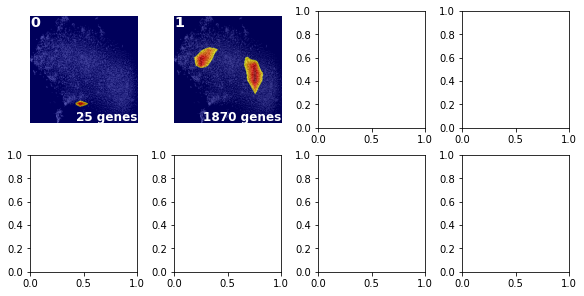

In [86]:
_ = cam_image(X_train_tensor, y_train_tensor.detach().cpu().numpy(), class_cam, feat_idx, fs_threshold)


In [87]:
for cat, idx in feat_idx.items():
    feature_names = genes[idx]
    print(f"{idx.shape[0]:5} features selected for {le_mapping[cat]:4}: {', '.join(feature_names[1:10])}...")

   25 features selected for    0: SPECC1L, FOXJ1, PDC, MUC15, C1orf189, ZXDC, UBASH3A, TSPAN31, TPST1...
 1870 features selected for    1: SPECC1L, OR4K15, C1orf189, ALG1L, UBASH3A, C16orf74, ANAPC10, TMEM9, RAX...


In [88]:
feat = pd.DataFrame()
for cat, idx in feat_idx.items():
    feature_names = genes[idx]
    feat = pd.concat([feat, pd.DataFrame({'cancer':le_mapping[cat], 'gene':feature_names})])
fdf = feat.assign(selected=1).pivot(index='cancer', columns='gene', values="selected").fillna(0).astype(int)

pd.DataFrame(
    np.matmul(fdf.values,fdf.T.values),
    index=fdf.index.values,
    columns=fdf.index.values
)

,0,1
0,25,11
1,11,1870


C:\Users\sathy\OneDrive\Documents\GitHub\Glioblastoma_analysis\venv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


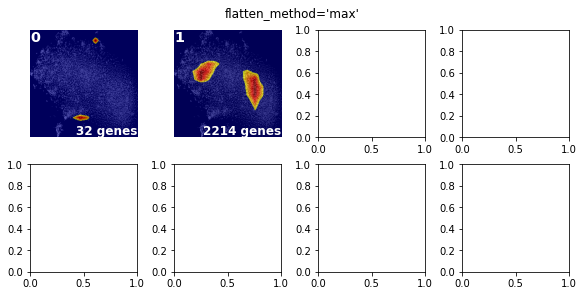

In [89]:
fl_method = 'max'

class_cam = camfs.calculate_class_activations(X_train_tensor, y_train_tensor, batch_size=100, flatten_method=fl_method)
feat_idx = camfs.select_class_features(cams=class_cam, threshold=fs_threshold)
fig, _ = cam_image(X_train_tensor, y_train_tensor.detach().cpu().numpy(), class_cam, feat_idx, fs_threshold)
fig.suptitle(f"flatten_method='{fl_method}'")
plt.show()

C:\Users\sathy\OneDrive\Documents\GitHub\Glioblastoma_analysis\venv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


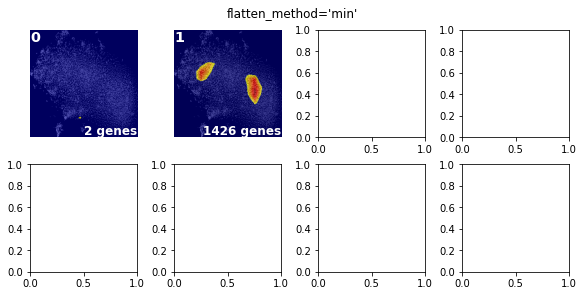

In [90]:
fl_method = 'min'

class_cam = camfs.calculate_class_activations(X_train_tensor, y_train_tensor, batch_size=100, flatten_method=fl_method)
feat_idx = camfs.select_class_features(cams=class_cam, threshold=fs_threshold)
fig, _ = cam_image(X_train_tensor, y_train_tensor.detach().cpu().numpy(), class_cam, feat_idx, fs_threshold)
fig.suptitle(f"flatten_method='{fl_method}'")
plt.show()

In [91]:
fl_method = 'mean'
class_cam = camfs.calculate_class_activations(X_train_tensor, y_train_tensor, batch_size=100, flatten_method=fl_method)

C:\Users\sathy\OneDrive\Documents\GitHub\Glioblastoma_analysis\venv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


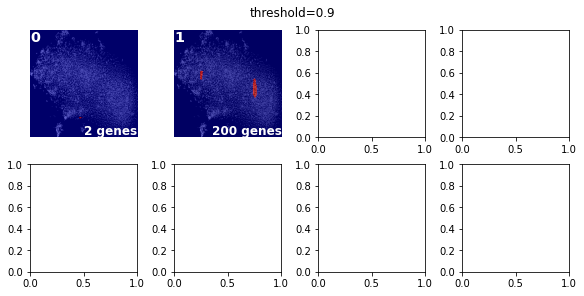

In [92]:
fs_threshold=0.9

feat_idx = camfs.select_class_features(cams=class_cam, threshold=fs_threshold)
fig, _ = cam_image(X_train_tensor, y_train_tensor.detach().cpu().numpy(), class_cam, feat_idx, fs_threshold)
fig.suptitle(f"threshold={fs_threshold}")
plt.show()

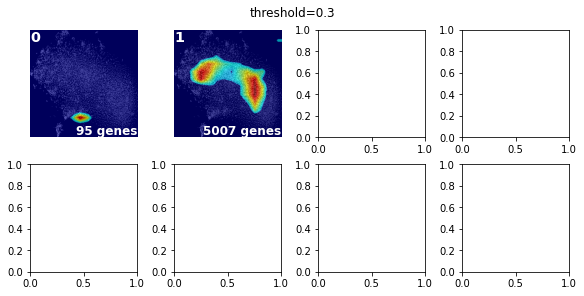

In [93]:
fs_threshold=0.3

feat_idx = camfs.select_class_features(cams=class_cam, threshold=fs_threshold)
fig, _ = cam_image(X_train_tensor, y_train_tensor.detach().cpu().numpy(), class_cam, feat_idx, fs_threshold)
fig.suptitle(f"threshold={fs_threshold}")
plt.show()


C:\Users\sathy\OneDrive\Documents\GitHub\Glioblastoma_analysis\venv\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


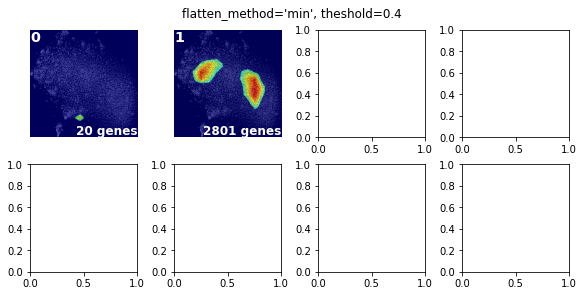

In [94]:
fl_method = 'min'
fs_threshold = 0.4

class_cam = camfs.calculate_class_activations(X_train_tensor, y_train_tensor, batch_size=100, flatten_method=fl_method)
feat_idx = camfs.select_class_features(cams=class_cam, threshold=fs_threshold)
fig, _ = cam_image(X_train_tensor, y_train_tensor.detach().cpu().numpy(), class_cam, feat_idx, fs_threshold)
fig.suptitle(f"flatten_method='{fl_method}', theshold={fs_threshold}")
plt.show()